Hello! My name is Sandesh Khanal. I am a Machine Learning Analyst Student from NorQuest College and my student id is 3098971.

Today I am doing a project on 'The Blockbuster Predictor.' As a huge movie fan myself and my all-time favorite movie is the classic Forrest Gump and I have always wondered: what actually makes a movie a hit? Is it the budget? The director? Or is it just luck?

In this project, I won't just guess. I will use Machine Learning to find the answer. I have built a pipeline using Python to load raw IMDB data, clean it, engineer features like 'Star Power,' and train a Random Forest model to scientifically predict if a movie will be a 'Hit' or a 'Flop'."

# 1. Importing Libraries and CSV file


In [9]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from a publicly available library
url = "https://raw.githubusercontent.com/sundeepblue/movie_rating_prediction/master/movie_metadata.csv"
df = pd.read_csv(url)

# Display the first 5 rows to understand the structure
print(f"Initial Dataset Shape: {df.shape}")
df.head()

Initial Dataset Shape: (5043, 28)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# 2. Data Cleaning

In [10]:
#Check for duplicate values
df.duplicated().sum()

np.int64(45)

In [11]:
# Remove exact duplicates
df.drop_duplicates(inplace=True)

# Check for missing values in key columns
print("Missing values before cleaning:")
print(df[['gross', 'budget', 'imdb_score']].isnull().sum())

# Drop rows where financial data or score is missing
df.dropna(subset=['gross', 'budget', 'imdb_score', 'director_name'], inplace=True)

print(f"\nCleaned Dataset Shape: {df.shape}")

Missing values before cleaning:
gross         874
budget        487
imdb_score      0
dtype: int64

Cleaned Dataset Shape: (3857, 28)


In [13]:
df.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000
10,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,...,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000


# 3. Feature Engineering

In [14]:


# Create a composite feature for 'Star Power'
# Summing up the likes of the top 3 billed actors
df['cast_total_facebook_likes'] = (df['actor_1_facebook_likes'].fillna(0) +
                                   df['actor_2_facebook_likes'].fillna(0) +
                                   df['actor_3_facebook_likes'].fillna(0))

# Create the Target Variable (Binary Classification)
# Rule: If IMDB Score > 7.0, it is a HIT (1). Otherwise, FLOP/AVG (0).
df['is_hit'] = df['imdb_score'].apply(lambda x: 1 if x > 7.0 else 0)

# Check the balance if it is 1 it is hit and 0 means flop
print("Target Distribution:")
print(df['is_hit'].value_counts())

Target Distribution:
is_hit
0    2683
1    1174
Name: count, dtype: int64


# 4. EDA

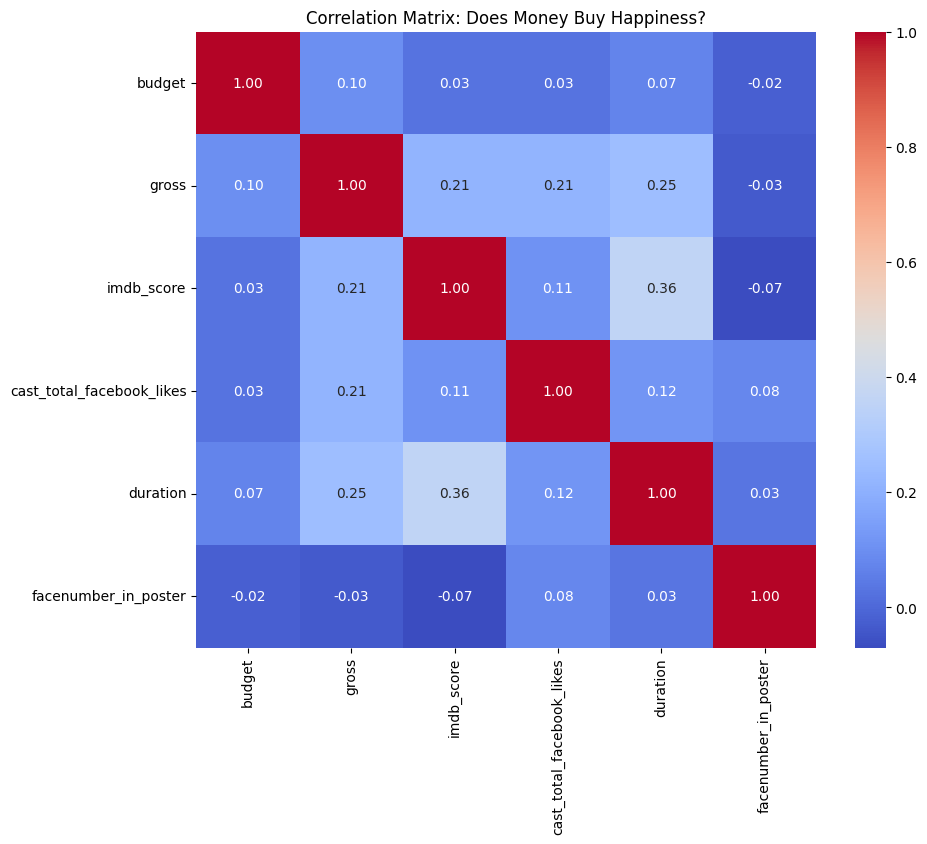

In [15]:
# Select only numeric columns for correlation
numeric_df = df[['budget', 'gross', 'imdb_score', 'cast_total_facebook_likes', 'duration', 'facenumber_in_poster']]

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Does Money Buy Happiness?")
plt.show()

/tmp/ipython-input-736739949.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.values, y=top_actors.index, palette='viridis')


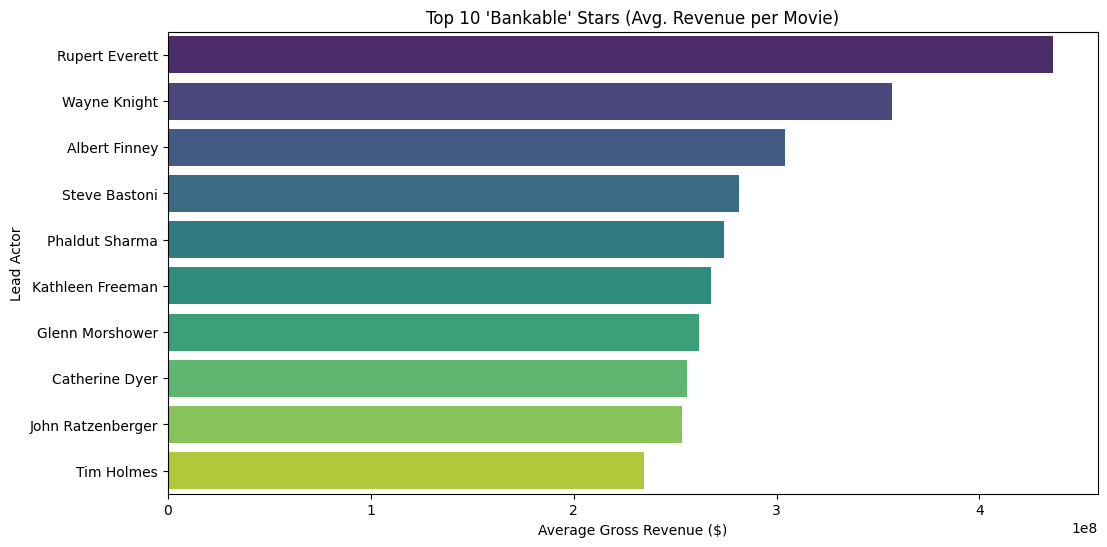

In [16]:
# We group by the Lead Actor and calculate the Average Gross Revenue of their movies
top_actors = df.groupby('actor_1_name')['gross'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='viridis')

plt.title("Top 10 'Bankable' Stars (Avg. Revenue per Movie)")
plt.xlabel("Average Gross Revenue ($)")
plt.ylabel("Lead Actor")
plt.show()

--- The Tom Hanks Effect ---
Number of Tom Hanks movies in dataset: 24
Tom Hanks Avg IMDB Score: 7.43 (Global Avg: 6.46)
Tom Hanks Avg Revenue:    $136,023,295 (Global Avg: $50,912,638)


/tmp/ipython-input-2746078217.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_df, x='Person', y='Score', palette=['gold', 'grey'])


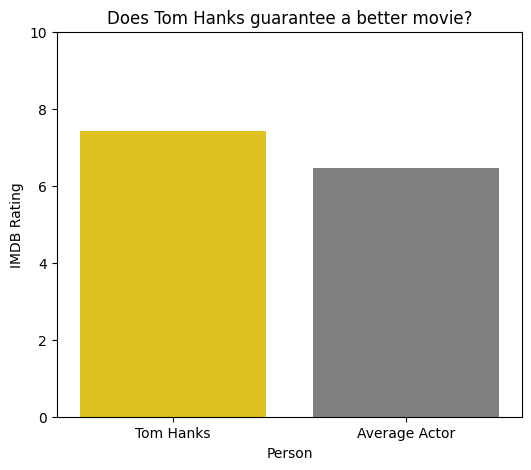

In [17]:
# Get stats for Tom Hanks
hanks_movies = df[df['actor_1_name'] == 'Tom Hanks']
hanks_avg_score = hanks_movies['imdb_score'].mean()
hanks_avg_gross = hanks_movies['gross'].mean()

# Get stats for everyone else
global_avg_score = df['imdb_score'].mean()
global_avg_gross = df['gross'].mean()

# Compare them
print(f"--- The Tom Hanks Effect ---")
print(f"Number of Tom Hanks movies in dataset: {len(hanks_movies)}")
print(f"Tom Hanks Avg IMDB Score: {hanks_avg_score:.2f} (Global Avg: {global_avg_score:.2f})")
print(f"Tom Hanks Avg Revenue:    ${hanks_avg_gross:,.0f} (Global Avg: ${global_avg_gross:,.0f})")

# Visual Comparison
comparison_df = pd.DataFrame({
    'Metric': ['Avg IMDB Score', 'Avg IMDB Score'],
    'Person': ['Tom Hanks', 'Average Actor'],
    'Score': [hanks_avg_score, global_avg_score]
})

plt.figure(figsize=(6, 5))
sns.barplot(data=comparison_df, x='Person', y='Score', palette=['gold', 'grey'])
plt.title("Does Tom Hanks guarantee a better movie?")
plt.ylim(0, 10) # IMDB scores are 0-10
plt.ylabel("IMDB Rating")
plt.show()

# 5. Test/Train Split

In [18]:
from sklearn.model_selection import train_test_split

# Define Features (X) and Target (y)
feature_cols = ['duration', 'director_facebook_likes', 'actor_1_facebook_likes',
                'gross', 'budget', 'cast_total_facebook_likes', 'facenumber_in_poster']

X = df[feature_cols]
y = df['is_hit']

# Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data: {X_train.shape}")
print(f"Testing Data: {X_test.shape}")

Training Data: (3085, 7)
Testing Data: (772, 7)


# 6. Model Training and Evaluation

Model Accuracy: 0.7784974093264249

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       541
           1       0.69      0.48      0.56       231

    accuracy                           0.78       772
   macro avg       0.74      0.69      0.71       772
weighted avg       0.77      0.78      0.77       772



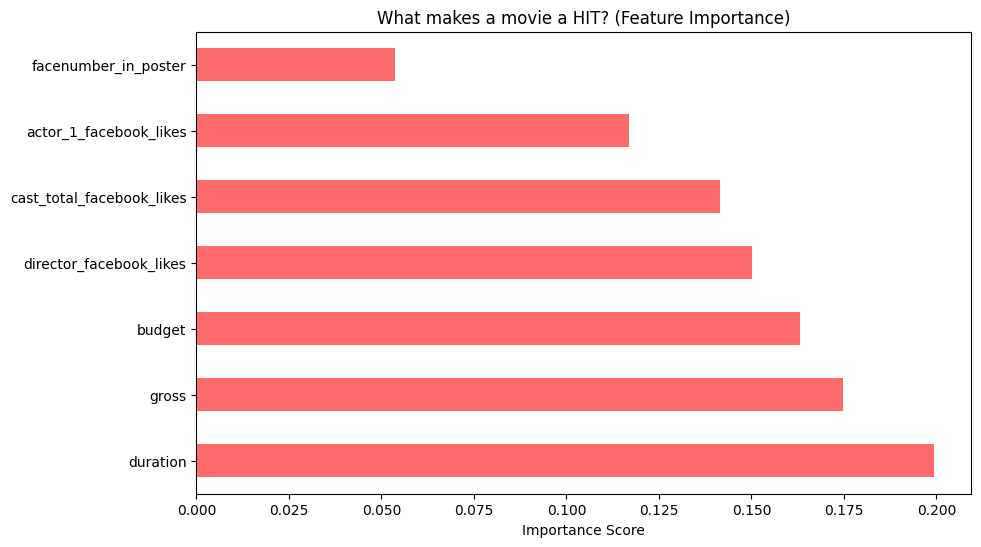

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and Train
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on Test Set
y_pred = rf.predict(X_test)

# Evaluation Metrics
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Feature Importance Plot
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(rf.feature_importances_, index=feature_cols)
feat_importances.nlargest(10).plot(kind='barh', color='#ff6b6b')
plt.title("What makes a movie a HIT? (Feature Importance)")
plt.xlabel("Importance Score")
plt.show()

# 7. The Interactive Dashboard

In [ ]:
def predict_movie_success(movie_name):
    # Search for the movie (Case Insensitive)
    # We use 'str.contains' to find matches (e.g., "Forrest" finds "Forrest Gump")
    match = df[df['movie_title'].str.contains(movie_name, case=False, na=False)]

    if len(match) == 0:
        print(f"❌ Sorry, I couldn't find '{movie_name}' in the dataset. Try 'Titanic' or 'Avatar'.")
        return

    # Grab the first match (in case there are sequels, we take the first one)
    movie_data = match.iloc[0]

    # Extract the exact features the model was trained on
    # (Must be the same order as X_train!)
    features_to_check = [
        movie_data['duration'],
        movie_data['director_facebook_likes'],
        movie_data['actor_1_facebook_likes'],
        movie_data['gross'],
        movie_data['budget'],
        movie_data['cast_total_facebook_likes'],
        movie_data['facenumber_in_poster']
    ]

    # Reshape because model expects a list of rows, not just one row
    features_array = [features_to_check]

    # Ask the AI to Predict
    prediction = rf.predict(features_array)[0]
    probability = rf.predict_proba(features_array)[0][1] # Confidence score

    # Show the Result
    print(f"\n🎬 MOVIE FOUND: {movie_data['movie_title'].strip()}")
    print(f"   Budget: ${movie_data['budget']:,.0f}")
    print(f"   Actual IMDB Score: {movie_data['imdb_score']}")
    print("-" * 30)

    if prediction == 1:
        print(f"🤖 AI PREDICTION: 🌟 BLOCKBUSTER HIT! ({probability:.0%} confidence)")
    else:
        print(f"🤖 AI PREDICTION: 📉 FLOP / AVERAGE ({probability:.0%} confidence)")

    # Check if the AI was right
    actual_status = "HIT" if movie_data['imdb_score'] > 7.0 else "FLOP"
    print(f"✅ REALITY CHECK: It was actually a {actual_status}.")

# This will ask you for input directly in Colab
print("Type a movie name below (or type 'exit' to stop):")

while True:
    user_input = input("\nEnter Movie Name: ")
    if user_input.lower() == 'exit':
        break
    predict_movie_success(user_input)

Type a movie name below (or type 'exit' to stop):

Enter Movie Name: Avatar


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



🎬 MOVIE FOUND: Avatar
   Budget: $237,000,000
   Actual IMDB Score: 7.9
------------------------------
🤖 AI PREDICTION: 📉 FLOP / AVERAGE (40% confidence)
✅ REALITY CHECK: It was actually a HIT.
